In [1]:
# we have lots of model outputs, now let's test it to see what works
import torch
import sys
sys.path.append('/data/leslie/sarthak/caduceus')
import evals.evals_utils_enformer as e

In [18]:
#now let's load the model anad we can plot some things
import numpy as np
split = 'test'

labels = np.load(f'/data/leslie/sarthak/data/enformer/data/{split}_label.npy')

evals = e.Evals('/data/leslie/sarthak/caduceus/outputs/2024-09-06/11-44-16-039839/checkpoints/35-val_loss=0.58459.ckpt')

Using kmer genome with length 6
4675


In [4]:
#now we can load the enformer results
enformer = np.load('/data/leslie/sarthak/data/enformer/data/model_out/enformer.npy')
print(enformer.shape)

(1937, 896, 5313)


In [19]:
#now we define a function that can easily plot things based on track
import matplotlib.pyplot as plt

file_path = '/data/leslie/sarthak/data/enformer/data/human/targets.txt'

# Initialize an empty dictionary
targets_dict = {}

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        #skip the first line
        if line.startswith('index'):
            continue
        # Split the line into columns
        columns = line.strip().split('\t')
        
        # The first column (index 0) is the key
        key = int(columns[0])
        
        # The last column is the description
        description = columns[-1]
        
        # Add to the dictionary
        targets_dict[key] = description

def plot_track(evals, enf_out, idx, track=121):
    '''
    given an index, plots one track and compares it to the real results
    '''
    #now plot the track
    seq, label = evals.dataset[idx]
    # data = data.cpu().numpy()
    x = evals(data = seq).cpu().squeeze().numpy()
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    ax1.plot(x[:, track], label='Predicted Coverage', color='b')
    ax1.set_title('Predicted Coverage')
    ax1.legend()

    ax2.plot(enf_out[idx,:,track], label='Enformer Output', color='g')
    ax2.set_title('Enformer Output')
    ax2.legend()

    ax3.plot(label[:, track], label='Actual Coverage', color='r')
    ax3.set_title('Actual Coverage')
    ax3.legend()

    ax3.set_xlabel('Position')
    fig.suptitle(f'Model Coverage Comparison, Track {targets_dict[track]}, sample {idx}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return fig, (ax1, ax2, ax3)

In [20]:
targets_dict

{0: 'DNASE:cerebellum male adult (27 years) and male adult (35 years)',
 1: 'DNASE:frontal cortex male adult (27 years) and male adult (35 years)',
 2: 'DNASE:chorion',
 3: 'DNASE:Ishikawa treated with 0.02% dimethyl sulfoxide for 1 hour',
 4: 'DNASE:GM03348',
 5: 'DNASE:GM03348 genetically modified using transduction treated with 3 ug/mL doxycycline for 10 days',
 6: 'DNASE:AG08395',
 7: 'DNASE:AG08396',
 8: 'DNASE:AG20443',
 9: 'DNASE:frontal cortex female adult (67 years) and female adult (80 years)',
 10: 'DNASE:H54',
 11: 'DNASE:GM10248',
 12: 'DNASE:GM12878',
 13: 'DNASE:GM12891',
 14: 'DNASE:GM12892',
 15: 'DNASE:GM18507',
 16: 'DNASE:GM19238',
 17: 'DNASE:GM19239',
 18: 'DNASE:GM19240',
 19: 'DNASE:H1-hESC',
 20: 'DNASE:H7-hESC',
 21: 'DNASE:H9',
 22: 'DNASE:heart male adult (27 years) and male adult (35 years)',
 23: 'DNASE:HEK293T',
 24: 'DNASE:HeLa-S3 treated with interferon alpha for 4 hours',
 25: 'DNASE:HeLa-S3',
 26: 'DNASE:hepatocyte',
 27: 'DNASE:HepG2',
 28: 'DNASE:HT

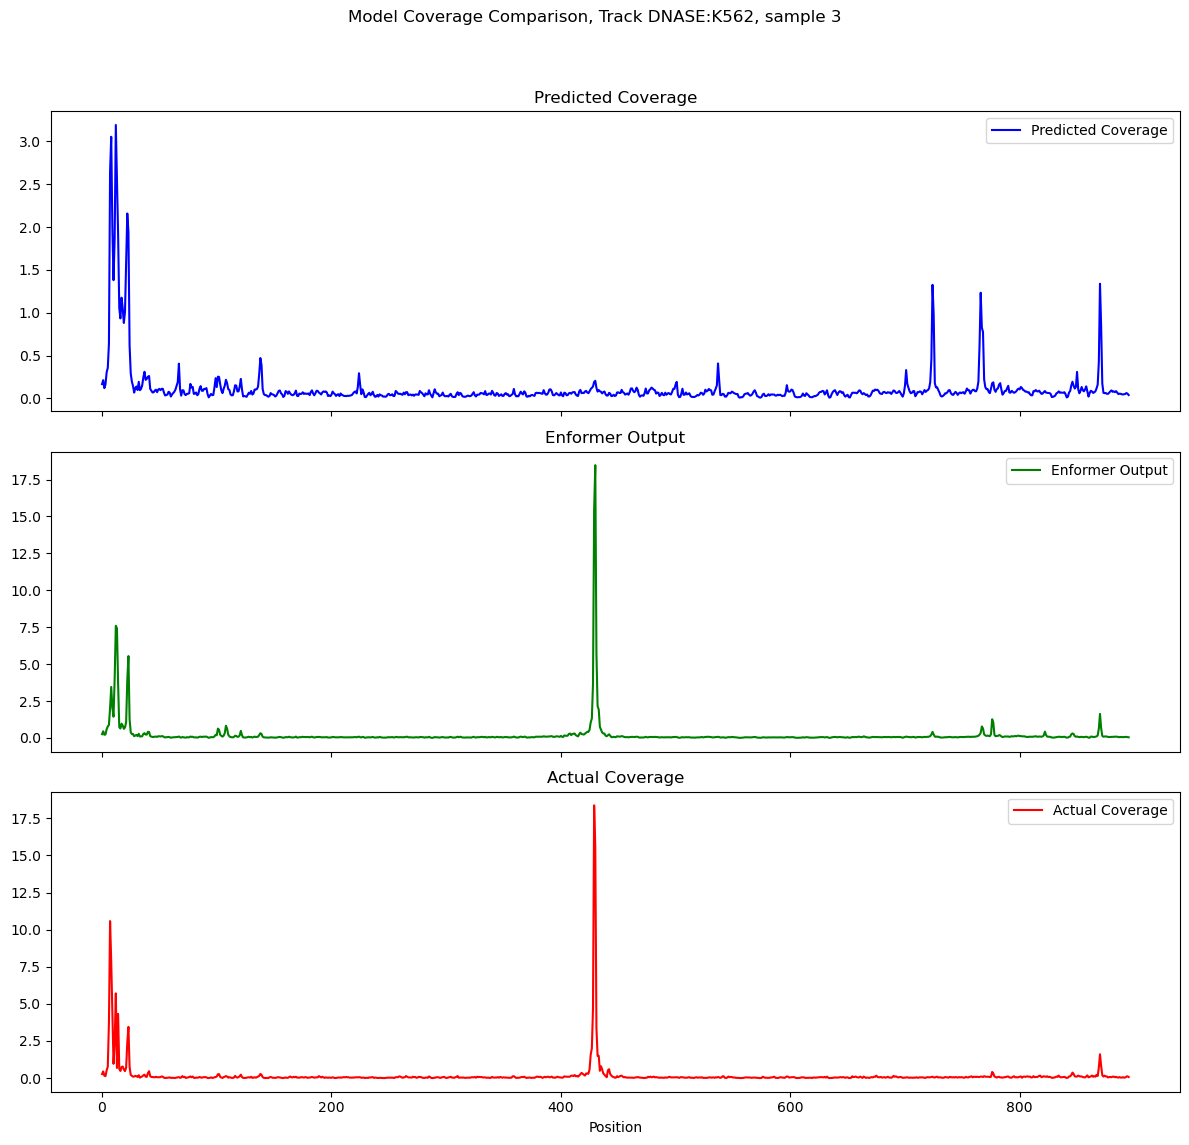

(<Figure size 1200x1200 with 3 Axes>,
 (<Axes: title={'center': 'Predicted Coverage'}>,
  <Axes: title={'center': 'Enformer Output'}>,
  <Axes: title={'center': 'Actual Coverage'}, xlabel='Position'>))

In [21]:
plot_track(evals, enformer, 3, track=121)

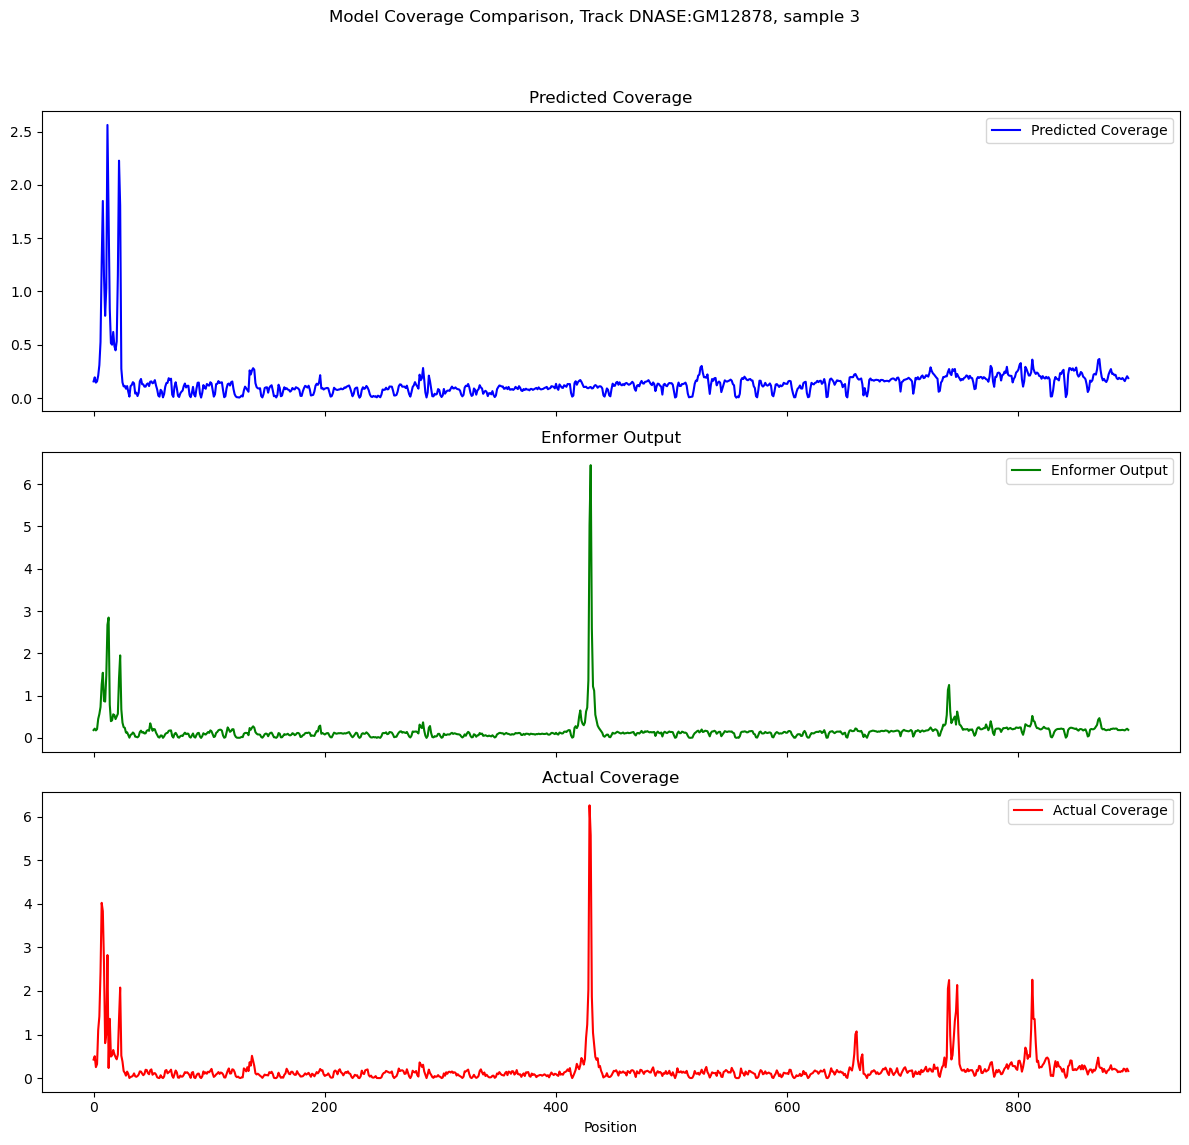

(<Figure size 1200x1200 with 3 Axes>,
 (<Axes: title={'center': 'Predicted Coverage'}>,
  <Axes: title={'center': 'Enformer Output'}>,
  <Axes: title={'center': 'Actual Coverage'}, xlabel='Position'>))

In [17]:
#now we can do it for other tracks too
plot_track(evals, enformer, 3, track=12)

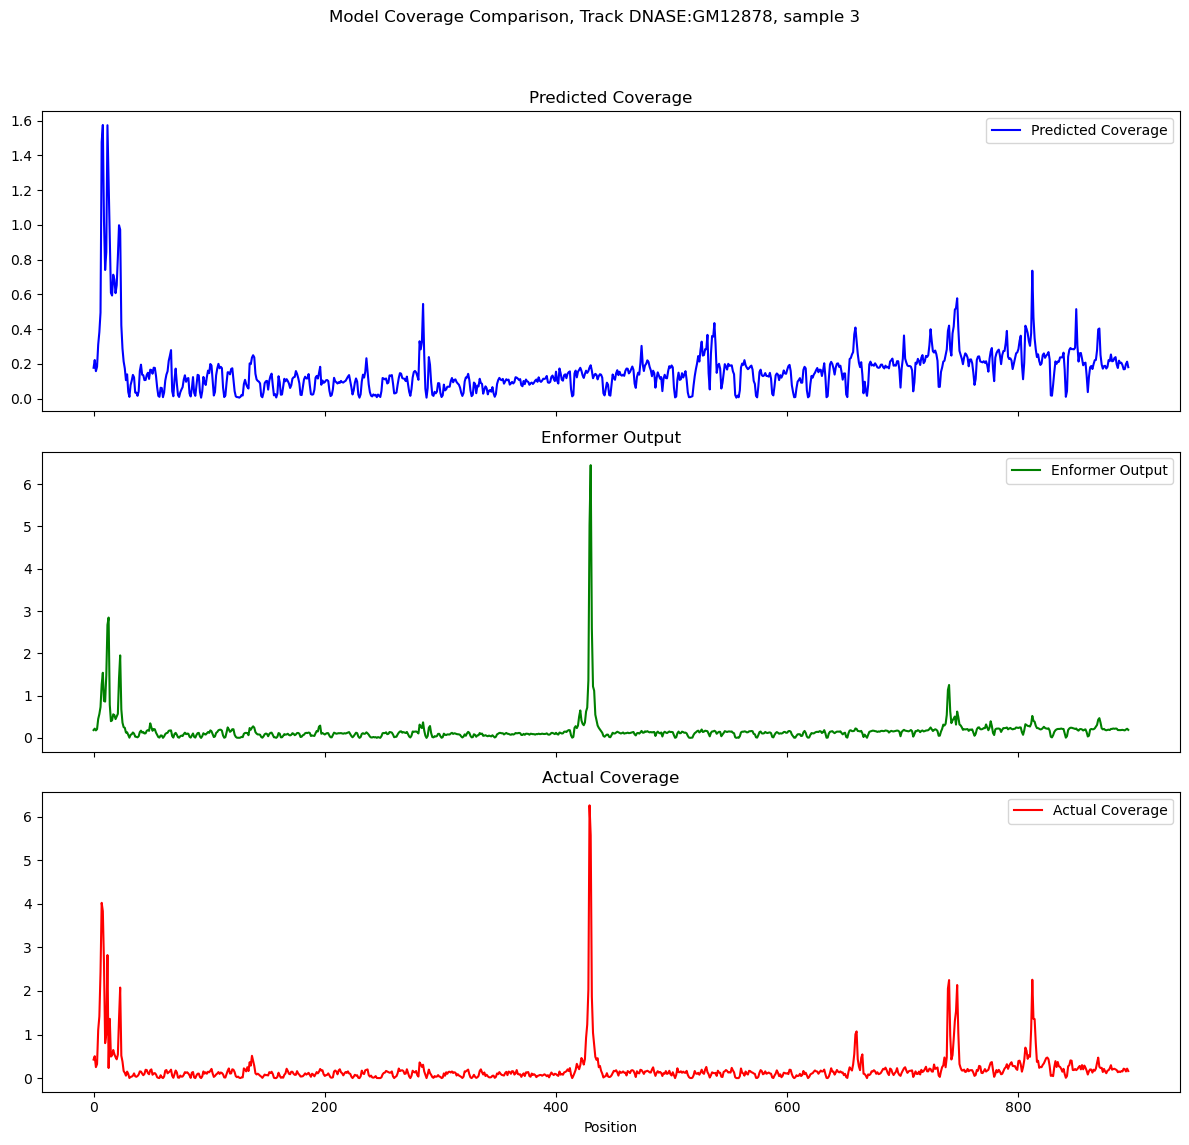

(<Figure size 1200x1200 with 3 Axes>,
 (<Axes: title={'center': 'Predicted Coverage'}>,
  <Axes: title={'center': 'Enformer Output'}>,
  <Axes: title={'center': 'Actual Coverage'}, xlabel='Position'>))

In [22]:
#now we can do it for other tracks too
plot_track(evals, enformer, 3, track=12)

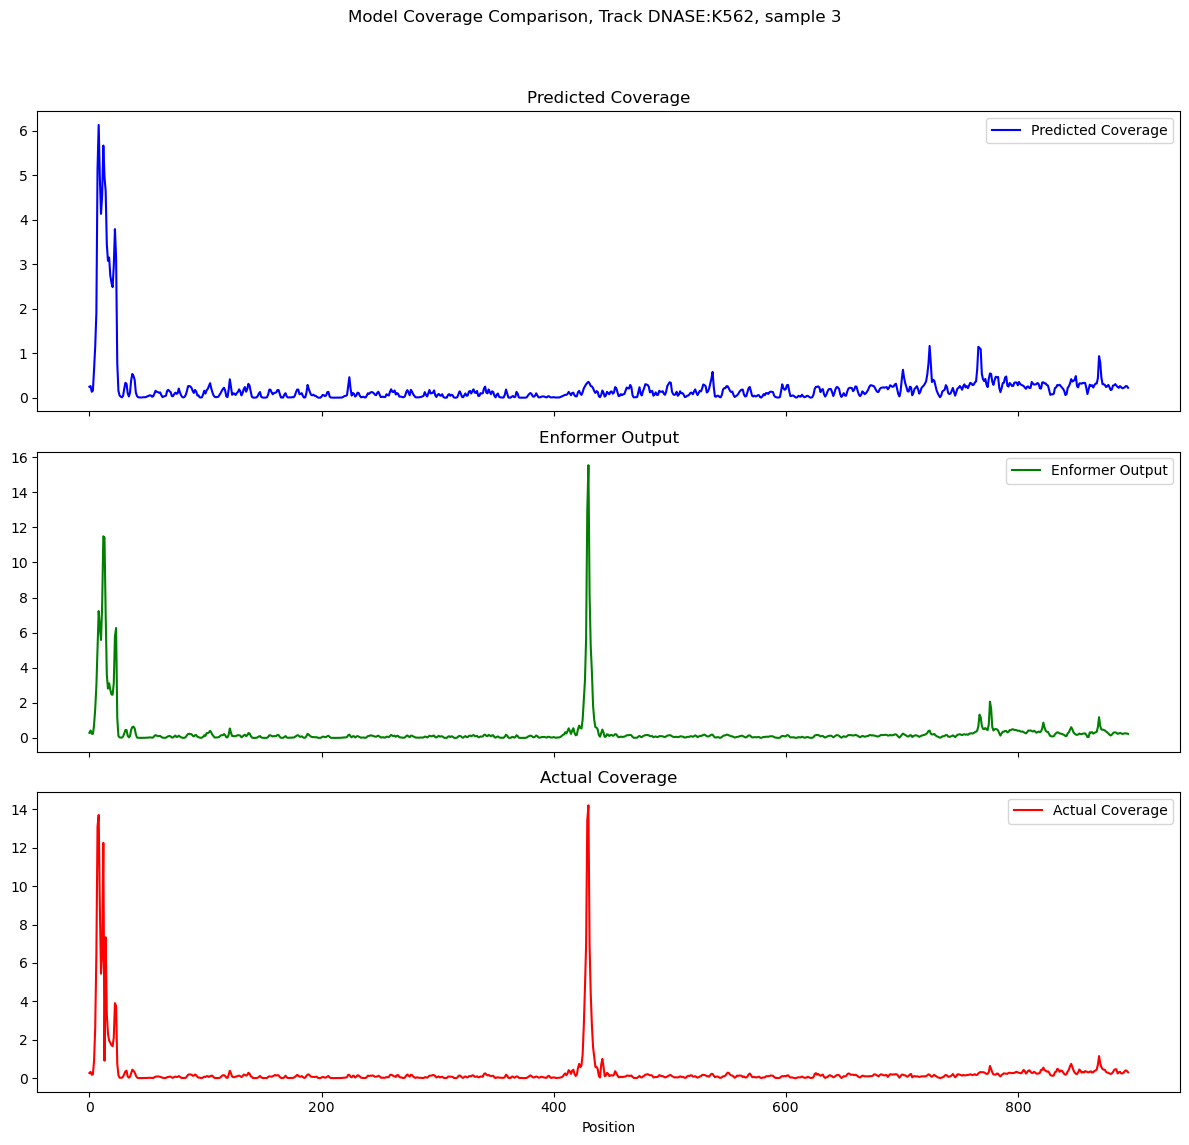

(<Figure size 1200x1200 with 3 Axes>,
 (<Axes: title={'center': 'Predicted Coverage'}>,
  <Axes: title={'center': 'Enformer Output'}>,
  <Axes: title={'center': 'Actual Coverage'}, xlabel='Position'>))

In [23]:
#ok it's actually quite poor on DNase, not sure why?

plot_track(evals, enformer, 3, track=625)

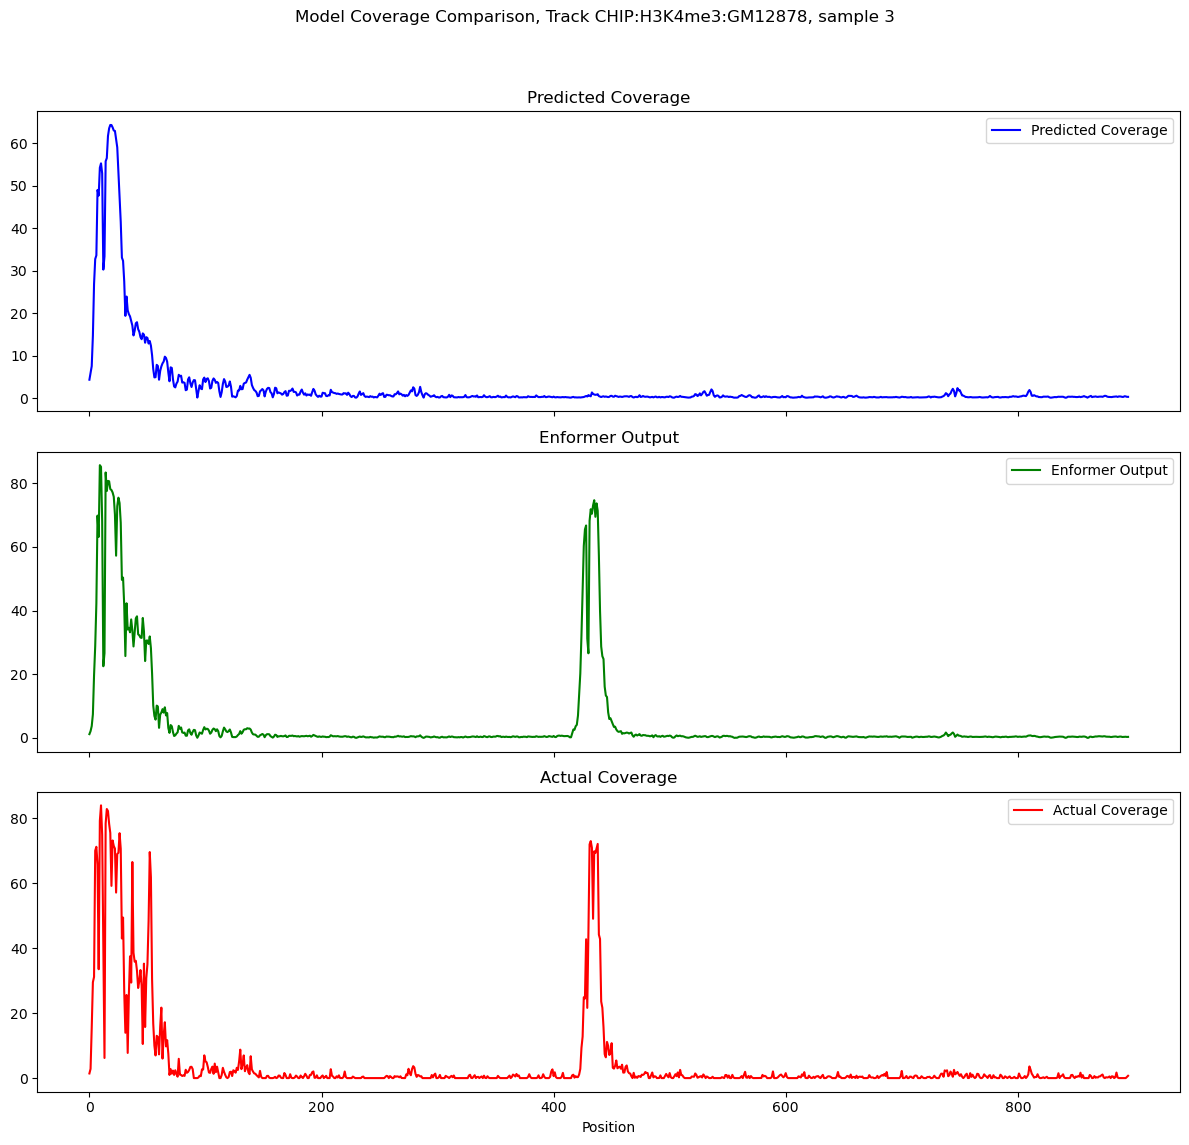

(<Figure size 1200x1200 with 3 Axes>,
 (<Axes: title={'center': 'Predicted Coverage'}>,
  <Axes: title={'center': 'Enformer Output'}>,
  <Axes: title={'center': 'Actual Coverage'}, xlabel='Position'>))

In [27]:
#it's just missing these middle regions???
#I think maybe there's some bug in the training, how could it be doing that?

plot_track(evals, enformer, 3, track=1143)

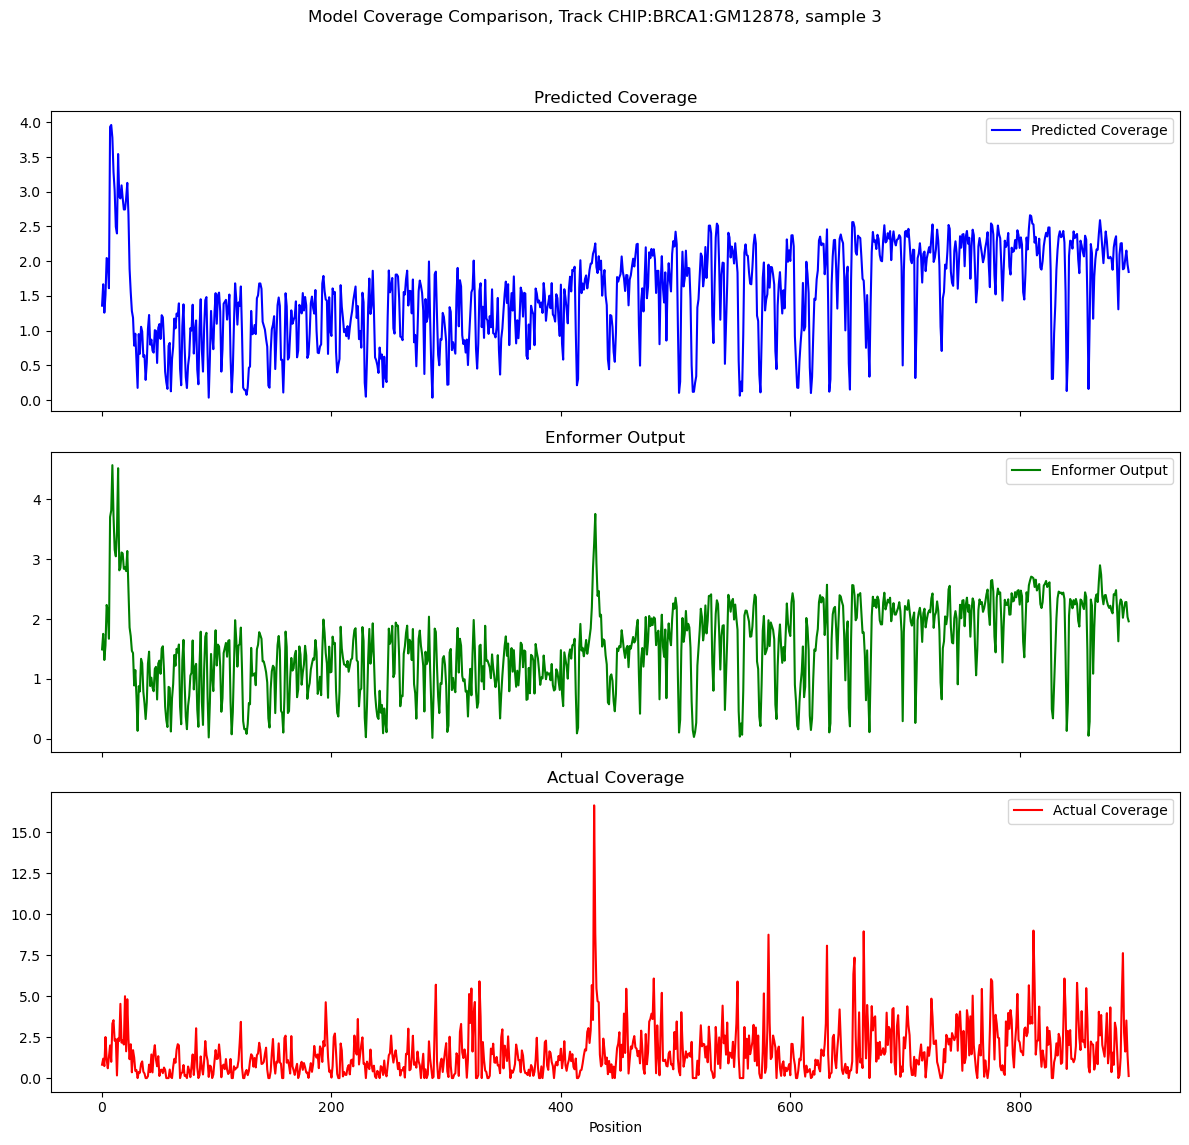

(<Figure size 1200x1200 with 3 Axes>,
 (<Axes: title={'center': 'Predicted Coverage'}>,
  <Axes: title={'center': 'Enformer Output'}>,
  <Axes: title={'center': 'Actual Coverage'}, xlabel='Position'>))

In [28]:
plot_track(evals, enformer, 3, track=1270) #now enformer misses this middle thing

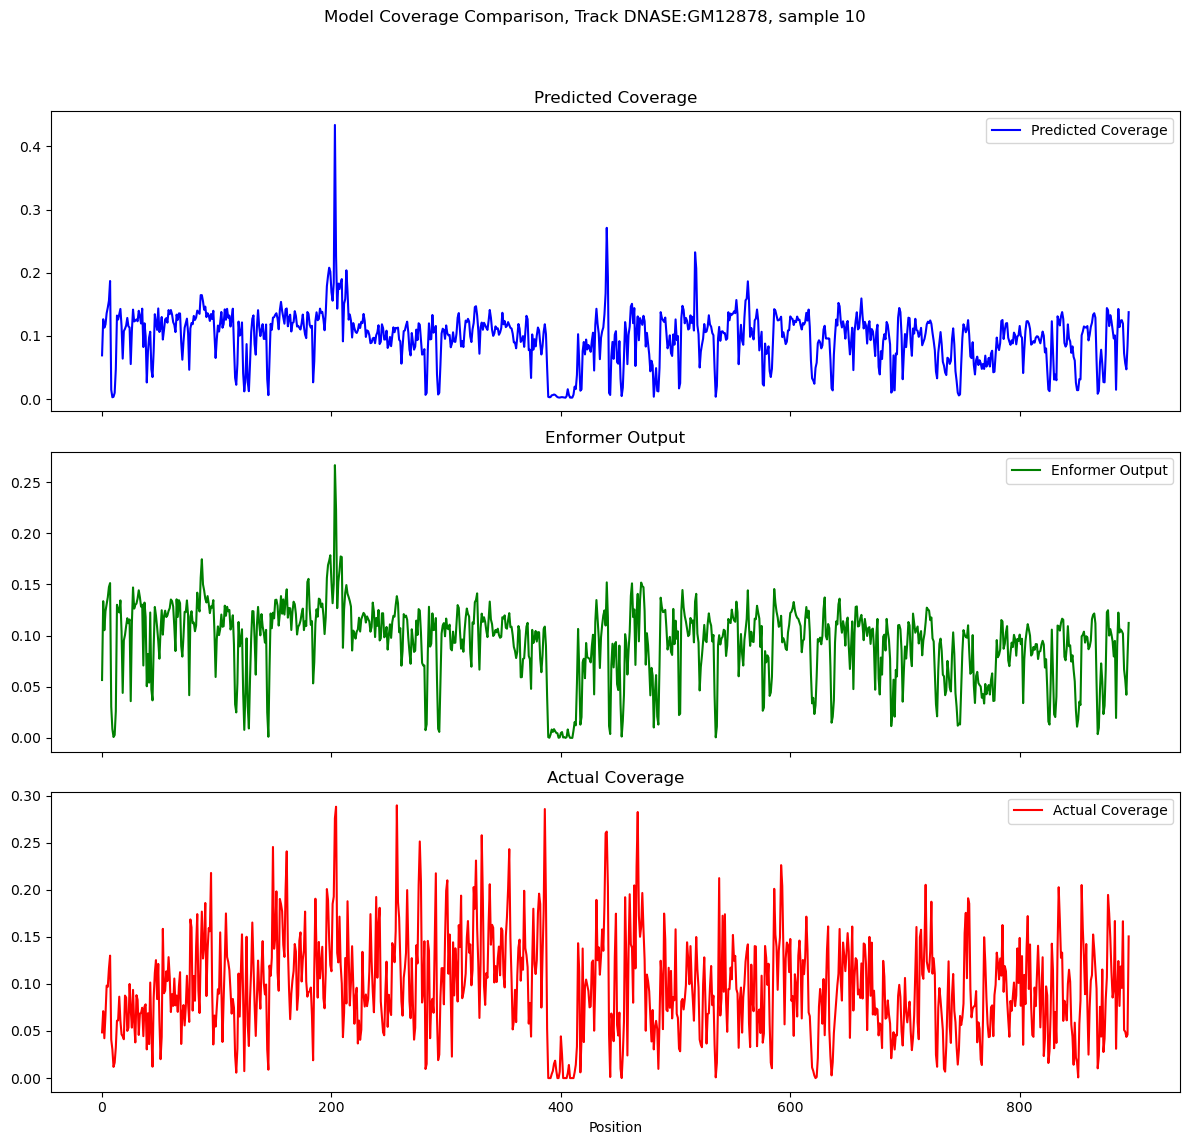

(<Figure size 1200x1200 with 3 Axes>,
 (<Axes: title={'center': 'Predicted Coverage'}>,
  <Axes: title={'center': 'Enformer Output'}>,
  <Axes: title={'center': 'Actual Coverage'}, xlabel='Position'>))

In [24]:
#now we can do it for other tracks too
plot_track(evals, enformer, 10, track=12)

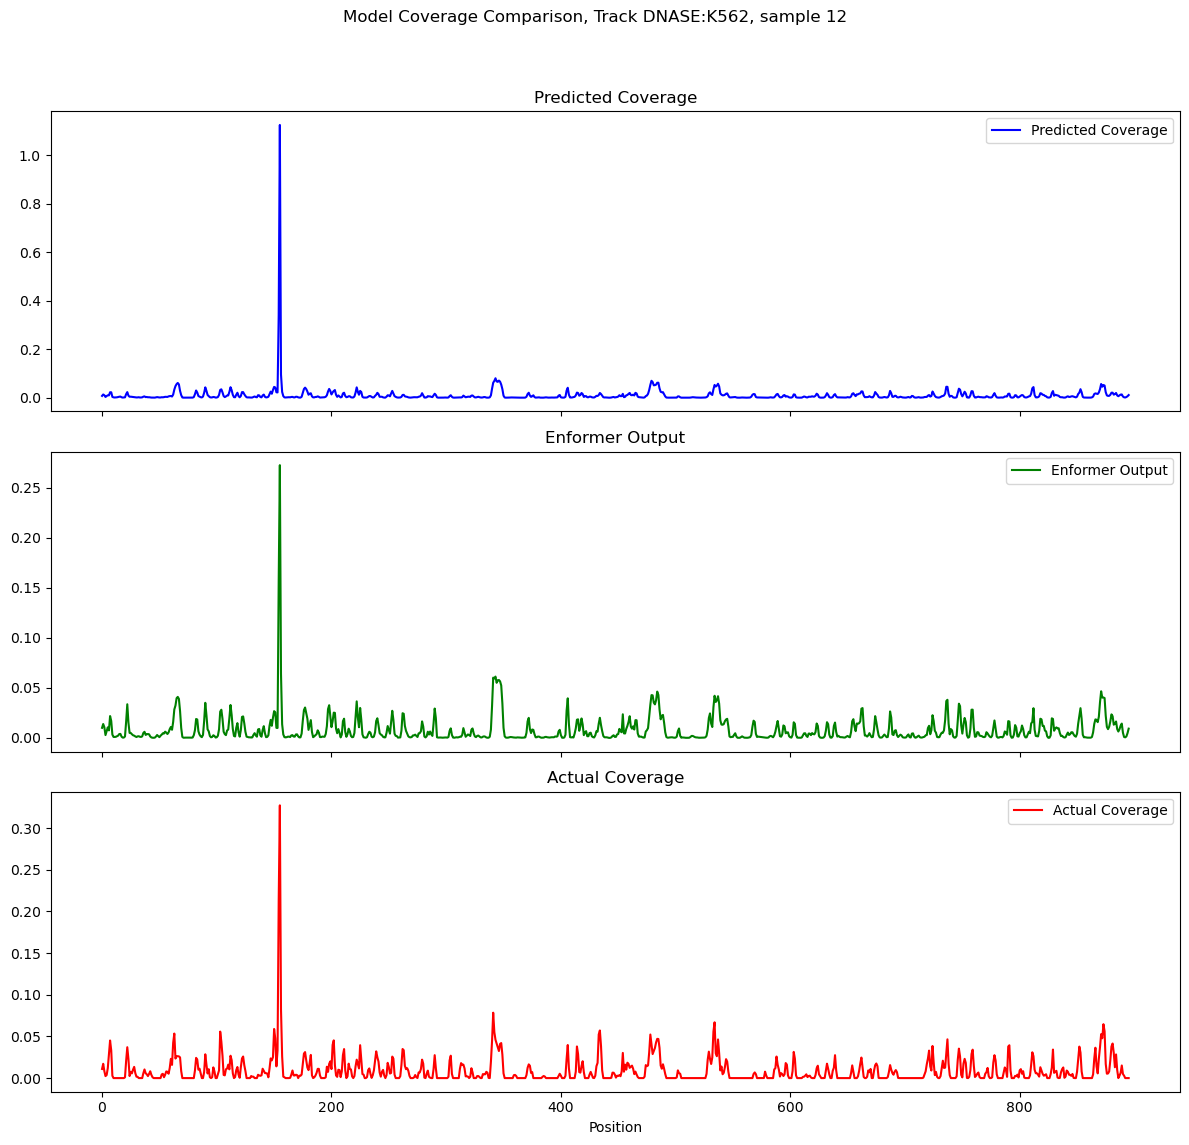

(<Figure size 1200x1200 with 3 Axes>,
 (<Axes: title={'center': 'Predicted Coverage'}>,
  <Axes: title={'center': 'Enformer Output'}>,
  <Axes: title={'center': 'Actual Coverage'}, xlabel='Position'>))

In [25]:
plot_track(evals, enformer, 12, track=625)